# Tugas Pertemuan 2 - Pre-Processing Data Berita detik.com

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/tugasPPWA/repository/Crawl-berita.csv")
df.head(6)

,judul,isi,tanggal,kategori
0,"Tentang Ichsan Taufiq, Juara Dunia FM 2024 Asa...","Jakarta - Indonesia baru saja memenangi ""Piala...","Kamis, 05 Sep 2024 06:15 WIB",sport
1,PBFI Jakarta Bertekad Bawa Pulang Medali Emas ...,Jakarta - Pengurus Provinsi Persatuan Binaraga...,"Kamis, 05 Sep 2024 02:15 WIB",sport
2,Tim Balap Indonesia Ini Tuntaskan Race di Sirk...,Jakarta - Tim balap Bendix X KDRT menjadi waki...,"Rabu, 04 Sep 2024 23:40 WIB",sport
3,Tiga Binaragawati Indonesia Tampil di Kejuaraa...,Manila - Tiga atlet wanita binaan Persatuan Bi...,"Rabu, 04 Sep 2024 22:45 WIB",sport
4,Klasemen Medali Paralimpiade 2024: Indonesia d...,Jakarta - China masih kokoh di posisinya pada ...,"Rabu, 04 Sep 2024 12:57 WIB",sport
5,Atlet Perbafi Sabet Tujuh Medali di Singapore ...,Singapura - Catatan gemilang baru saja diraih ...,"Rabu, 04 Sep 2024 02:30 WIB",sport


**CLEANING**


---



**Cleaning Data** adalah proses pemrosesan teks awal  yang bertujuan untuk membersihkan  data  teks dari elemen yang tidak perlu atau mengganggu, seperti:
- Tanda baca
(punctuation) titik, koma, tanda seru
- Tag
- URL
- Simbol-simbol
- Emoticon
- Angka random

In [ ]:
import re
import string
import nltk

def remove_url(ulasan):
  url = re.compile(r'https?://\S+|www\.S+')
  return url.sub(r'', ulasan)

def remove_html(ulasan):
  html = re.compile(r'<.#?>')
  return html.sub(r'', ulasan)

def remove_emoji(ulasan):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', ulasan)

def remove_numbers(ulasan):
  ulasan = re.sub(r'\d+', '', ulasan)
  return ulasan

def remove_symbols(ulasan):
  ulasan = re.sub(r'[^a-zA-Z0-9\s]', '', ulasan) #menghapus semua simbol
  return ulasan

df['cleansing'] = df['isi'].apply(lambda x: remove_url(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_symbols(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_numbers(x))

df.head(6)

,judul,isi,tanggal,kategori,cleansing
0,"Tentang Ichsan Taufiq, Juara Dunia FM 2024 Asa...","Jakarta - Indonesia baru saja memenangi ""Piala...","Kamis, 05 Sep 2024 06:15 WIB",sport,Jakarta Indonesia baru saja memenangi Piala D...
1,PBFI Jakarta Bertekad Bawa Pulang Medali Emas ...,Jakarta - Pengurus Provinsi Persatuan Binaraga...,"Kamis, 05 Sep 2024 02:15 WIB",sport,Jakarta Pengurus Provinsi Persatuan Binaraga ...
2,Tim Balap Indonesia Ini Tuntaskan Race di Sirk...,Jakarta - Tim balap Bendix X KDRT menjadi waki...,"Rabu, 04 Sep 2024 23:40 WIB",sport,Jakarta Tim balap Bendix X KDRT menjadi wakil...
3,Tiga Binaragawati Indonesia Tampil di Kejuaraa...,Manila - Tiga atlet wanita binaan Persatuan Bi...,"Rabu, 04 Sep 2024 22:45 WIB",sport,Manila Tiga atlet wanita binaan Persatuan Bin...
4,Klasemen Medali Paralimpiade 2024: Indonesia d...,Jakarta - China masih kokoh di posisinya pada ...,"Rabu, 04 Sep 2024 12:57 WIB",sport,Jakarta China masih kokoh di posisinya pada p...
5,Atlet Perbafi Sabet Tujuh Medali di Singapore ...,Singapura - Catatan gemilang baru saja diraih ...,"Rabu, 04 Sep 2024 02:30 WIB",sport,Singapura Catatan gemilang baru saja diraih a...


**CASE FOLDING**


---



**Casefolding** adalah langkah prapemrosesan yang mencakup mengubah semua karakter dalam teks menjadi huruf kecil. Tujuan dari casefolding adalah
adalah  untuk menghilangkan ambiguitas yang mungkin timbul akibat perbedaan huruf besar  dan kecil.
Misalnya, kata yang sama tetapi ditulis dengan huruf besar atau kecil akan  dianggap sebagai entitas yang berbeda.

In [ ]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else :
      return text

df ['case_folding'] = df['cleansing'].apply(case_folding)

df.head(6)

,judul,isi,tanggal,kategori,cleansing,case_folding
0,"Tentang Ichsan Taufiq, Juara Dunia FM 2024 Asa...","Jakarta - Indonesia baru saja memenangi ""Piala...","Kamis, 05 Sep 2024 06:15 WIB",sport,Jakarta Indonesia baru saja memenangi Piala D...,jakarta indonesia baru saja memenangi piala d...
1,PBFI Jakarta Bertekad Bawa Pulang Medali Emas ...,Jakarta - Pengurus Provinsi Persatuan Binaraga...,"Kamis, 05 Sep 2024 02:15 WIB",sport,Jakarta Pengurus Provinsi Persatuan Binaraga ...,jakarta pengurus provinsi persatuan binaraga ...
2,Tim Balap Indonesia Ini Tuntaskan Race di Sirk...,Jakarta - Tim balap Bendix X KDRT menjadi waki...,"Rabu, 04 Sep 2024 23:40 WIB",sport,Jakarta Tim balap Bendix X KDRT menjadi wakil...,jakarta tim balap bendix x kdrt menjadi wakil...
3,Tiga Binaragawati Indonesia Tampil di Kejuaraa...,Manila - Tiga atlet wanita binaan Persatuan Bi...,"Rabu, 04 Sep 2024 22:45 WIB",sport,Manila Tiga atlet wanita binaan Persatuan Bin...,manila tiga atlet wanita binaan persatuan bin...
4,Klasemen Medali Paralimpiade 2024: Indonesia d...,Jakarta - China masih kokoh di posisinya pada ...,"Rabu, 04 Sep 2024 12:57 WIB",sport,Jakarta China masih kokoh di posisinya pada p...,jakarta china masih kokoh di posisinya pada p...
5,Atlet Perbafi Sabet Tujuh Medali di Singapore ...,Singapura - Catatan gemilang baru saja diraih ...,"Rabu, 04 Sep 2024 02:30 WIB",sport,Singapura Catatan gemilang baru saja diraih a...,singapura catatan gemilang baru saja diraih a...


**TOKENIZATION**


---



**Tokenization atau Tokenisasi** Tujuannya adalah untuk mengelompokkan kemunculan  kata dalam proses berikut.
Lebih jelasnya untuk memecah teks menjadi unit terkecil yang dapat
berupa kata,frasa atau karakter terpisah.

In [ ]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(6)

,judul,isi,tanggal,kategori,cleansing,case_folding,tokenize
0,"Tentang Ichsan Taufiq, Juara Dunia FM 2024 Asa...","Jakarta - Indonesia baru saja memenangi ""Piala...","Kamis, 05 Sep 2024 06:15 WIB",sport,Jakarta Indonesia baru saja memenangi Piala D...,jakarta indonesia baru saja memenangi piala d...,"[jakarta, indonesia, baru, saja, memenangi, pi..."
1,PBFI Jakarta Bertekad Bawa Pulang Medali Emas ...,Jakarta - Pengurus Provinsi Persatuan Binaraga...,"Kamis, 05 Sep 2024 02:15 WIB",sport,Jakarta Pengurus Provinsi Persatuan Binaraga ...,jakarta pengurus provinsi persatuan binaraga ...,"[jakarta, pengurus, provinsi, persatuan, binar..."
2,Tim Balap Indonesia Ini Tuntaskan Race di Sirk...,Jakarta - Tim balap Bendix X KDRT menjadi waki...,"Rabu, 04 Sep 2024 23:40 WIB",sport,Jakarta Tim balap Bendix X KDRT menjadi wakil...,jakarta tim balap bendix x kdrt menjadi wakil...,"[jakarta, tim, balap, bendix, x, kdrt, menjadi..."
3,Tiga Binaragawati Indonesia Tampil di Kejuaraa...,Manila - Tiga atlet wanita binaan Persatuan Bi...,"Rabu, 04 Sep 2024 22:45 WIB",sport,Manila Tiga atlet wanita binaan Persatuan Bin...,manila tiga atlet wanita binaan persatuan bin...,"[manila, tiga, atlet, wanita, binaan, persatua..."
4,Klasemen Medali Paralimpiade 2024: Indonesia d...,Jakarta - China masih kokoh di posisinya pada ...,"Rabu, 04 Sep 2024 12:57 WIB",sport,Jakarta China masih kokoh di posisinya pada p...,jakarta china masih kokoh di posisinya pada p...,"[jakarta, china, masih, kokoh, di, posisinya, ..."
5,Atlet Perbafi Sabet Tujuh Medali di Singapore ...,Singapura - Catatan gemilang baru saja diraih ...,"Rabu, 04 Sep 2024 02:30 WIB",sport,Singapura Catatan gemilang baru saja diraih a...,singapura catatan gemilang baru saja diraih a...,"[singapura, catatan, gemilang, baru, saja, dir..."


**FILTERING/STOPWORD REMOVAL**


---



Tahap **Stopword Removal** yaitu langkah untuk memilih kata-kata yang  dianggap tidak penting atau  tidak relevan, untuk mengetahui kata-kata mana yang tidak relevan berdasarkan daftar stopword removal yang digunakan.



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Pada tahap ini menggunakan library **NLTK stopword removal bahasa indonesia**.Contoh stopwords dalam bahasa Indonesia adalah “yang” , “bahwa”, “itu”, ”ini”, “dengan” dan sebagainya.

In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['Filtering/stopword removal'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))

df.head(6)

,judul,isi,tanggal,kategori,cleansing,case_folding,tokenize,Filtering/stopword removal
0,"Tentang Ichsan Taufiq, Juara Dunia FM 2024 Asa...","Jakarta - Indonesia baru saja memenangi ""Piala...","Kamis, 05 Sep 2024 06:15 WIB",sport,Jakarta Indonesia baru saja memenangi Piala D...,jakarta indonesia baru saja memenangi piala d...,"[jakarta, indonesia, baru, saja, memenangi, pi...",jakarta indonesia memenangi piala dunia footba...
1,PBFI Jakarta Bertekad Bawa Pulang Medali Emas ...,Jakarta - Pengurus Provinsi Persatuan Binaraga...,"Kamis, 05 Sep 2024 02:15 WIB",sport,Jakarta Pengurus Provinsi Persatuan Binaraga ...,jakarta pengurus provinsi persatuan binaraga ...,"[jakarta, pengurus, provinsi, persatuan, binar...",jakarta pengurus provinsi persatuan binaraga f...
2,Tim Balap Indonesia Ini Tuntaskan Race di Sirk...,Jakarta - Tim balap Bendix X KDRT menjadi waki...,"Rabu, 04 Sep 2024 23:40 WIB",sport,Jakarta Tim balap Bendix X KDRT menjadi wakil...,jakarta tim balap bendix x kdrt menjadi wakil...,"[jakarta, tim, balap, bendix, x, kdrt, menjadi...",jakarta tim balap bendix x kdrt wakil indonesi...
3,Tiga Binaragawati Indonesia Tampil di Kejuaraa...,Manila - Tiga atlet wanita binaan Persatuan Bi...,"Rabu, 04 Sep 2024 22:45 WIB",sport,Manila Tiga atlet wanita binaan Persatuan Bin...,manila tiga atlet wanita binaan persatuan bin...,"[manila, tiga, atlet, wanita, binaan, persatua...",manila atlet wanita binaan persatuan binaraga ...
4,Klasemen Medali Paralimpiade 2024: Indonesia d...,Jakarta - China masih kokoh di posisinya pada ...,"Rabu, 04 Sep 2024 12:57 WIB",sport,Jakarta China masih kokoh di posisinya pada p...,jakarta china masih kokoh di posisinya pada p...,"[jakarta, china, masih, kokoh, di, posisinya, ...",jakarta china kokoh posisinya puncak klasemen ...
5,Atlet Perbafi Sabet Tujuh Medali di Singapore ...,Singapura - Catatan gemilang baru saja diraih ...,"Rabu, 04 Sep 2024 02:30 WIB",sport,Singapura Catatan gemilang baru saja diraih a...,singapura catatan gemilang baru saja diraih a...,"[singapura, catatan, gemilang, baru, saja, dir...",singapura catatan gemilang diraih atletatlet b...


In [ ]:
df.to_csv("/content/drive/My Drive/tugasPPWA/repository/hasil_preprocesing.csv",encoding='utf8', index=False)

---

**TERM FREQUENCY AND INVERSE DOCUMENT FREQUNENCY (TF-IDF)**

---

**Count Vectorizer** Ubah dokumen teks apa pun menjadi vektor yang berisi  frekuensi  setiap kata dalam dokumen. Pembobotan TF-IDF menghitung nilai bobot untuk setiap kata di setiap dokumen. Ini dibagi menjadi dua proses

yaitu **TF** dan **IDF**.

**TF (Term Frequency)** menghitung  kemunculan setiap kata dalam dokumen,  dan jika sebuah kata memiliki kemunculan  terbanyak,  kata tersebut memiliki nilai tertinggi.

**IDF (Inverse Document Frequency)** Hitung jumlah dokumen untuk setiap kata dengan nilai tertinggi yang  jarang muncul dalam dokumen.
 Jika kata  sering muncul di dokumen, hasilnya akan bernilai kecil.

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/tugasPPWA/repository/hasil_preprocesing.csv", sep=",")

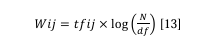

Keterangan :
- 𝑓𝑖,𝑗 : jumlah kata i muncul dalam dokumen j
- 𝑓𝑖 : jumlah dokumen yang mengandung I
- N : total seluruh dokumen.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer tanpa max_features dan stop_words
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF untuk kolom 'isi' dari dataframe
tfidf_matrix = vectorizer.fit_transform(df['Filtering/stopword removal'])

In [ ]:
# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,abai,acara,aceh,acehdiharapkan,acehsumatera,administrasi,adminstrasi,adrenalin,advertisement,afrika,...,workshop,world,xavi,xxi,ynaaff,ynabay,yordan,yuniarto,zambo,zcssejak
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024087,0.000000,...,0.0000,0.221529,0.032574,0.00000,0.000000,0.000000,0.000000,0.000000,0.032574,0.000000
1,0.000000,0.000000,0.045644,0.000000,0.053693,0.000000,0.000000,0.000000,0.039703,0.000000,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036875,0.000000,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049869
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051236,0.000000,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027201,0.000000,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.049221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042814,0.000000,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.023867,0.060866,0.000000,0.000000,0.000000,0.000000,0.000000,0.023867,0.017648,0.000000,...,0.0716,0.000000,0.000000,0.00000,0.000000,0.023867,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.031493,0.037046,0.000000,0.037046,0.037046,0.000000,0.027393,0.000000,...,0.0000,0.000000,0.000000,0.18523,0.000000,0.000000,0.000000,0.037046,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023214,0.031395,...,0.0000,0.026688,0.000000,0.00000,0.000000,0.000000,0.219762,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048674,0.000000,...,0.0000,0.000000,0.000000,0.00000,0.065825,0.000000,0.000000,0.000000,0.000000,0.000000
